In [0]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [0]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [38]:
train[train['label'] == 0].head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [39]:
train[train['label'] == 1].head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [40]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [41]:
print(train['label'].value_counts())

0    29720
1     2242
Name: label, dtype: int64


In [42]:
combi = train.append(test, ignore_index=True, sort = True) 
combi.shape

(49159, 3)

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt   

In [44]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [45]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [46]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [48]:
tokenized_tweet.head(5)

0                  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1    thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2                                                                                           bihday your majesty
3                                                                #model i love u take with u all the time in ur
4                                                                            factsguide society now #motivation
Name: tidy_tweet, dtype: object

In [49]:
from collections import Counter
all_words = ' '.join([text for text in combi['tidy_tweet']])

words = all_words.split()

counter = Counter(words)

total_words = len(words)
print(total_words)
sorted_words = counter.most_common(total_words)

610638


In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [51]:
reviews_int = []
for review in combi['tidy_tweet']:
  r = [vocab_to_int[w] for w in review.split()]
  reviews_int.append(r)
print(reviews_int[0:3])

[[38, 4, 86, 10, 14869, 6, 10, 22, 4161, 71, 9356, 97, 332, 245, 97, 14870, 1301], [170, 8, 11409, 2355, 3, 33, 18, 424, 625, 59, 70, 18, 1651, 14871, 14872, 7, 14873, 22887, 14874], [76, 25, 4162]]


In [0]:
reviews_int = np.array(reviews_int)

In [53]:
print(len(reviews_int))
print(reviews_int.dtype)

49159
object


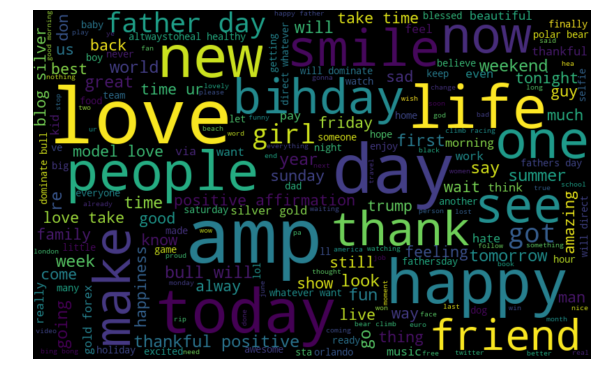

In [54]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

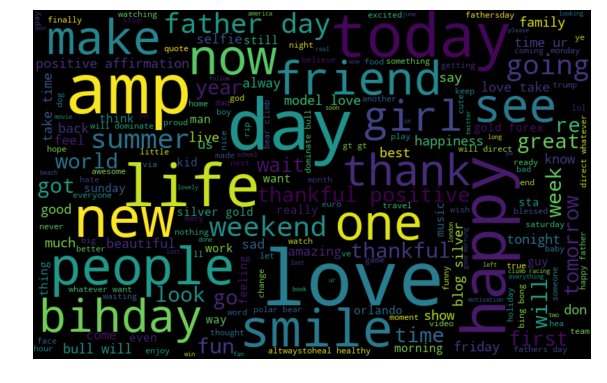

In [55]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

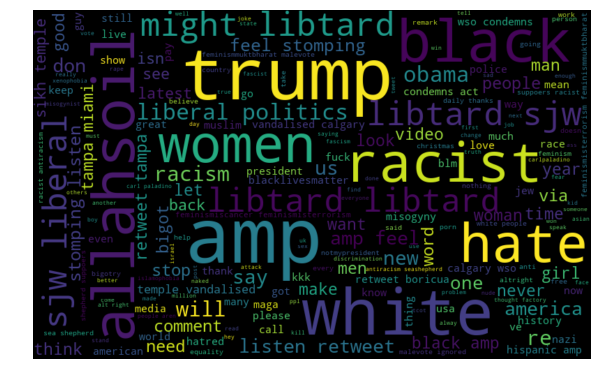

In [56]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
# function to collect hashtags 
def hashtag_extract(x):    
  hashtags = []    # Loop over the words in the tweet    
  for i in x:        
    ht = re.findall(r"#(\w+)", i)        
    hashtags.append(ht)     
  return hashtags
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

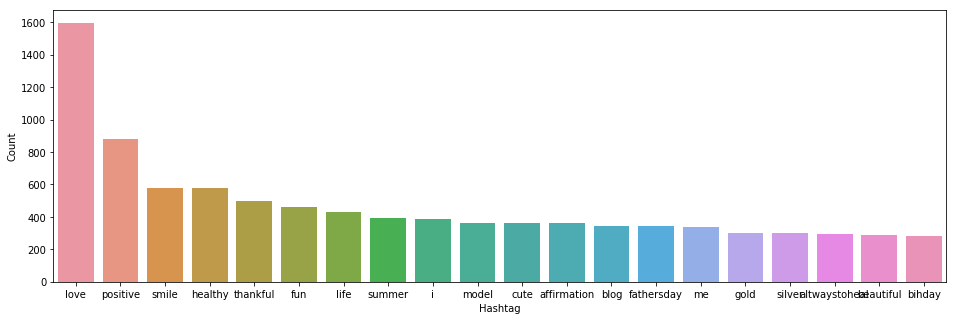

In [58]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

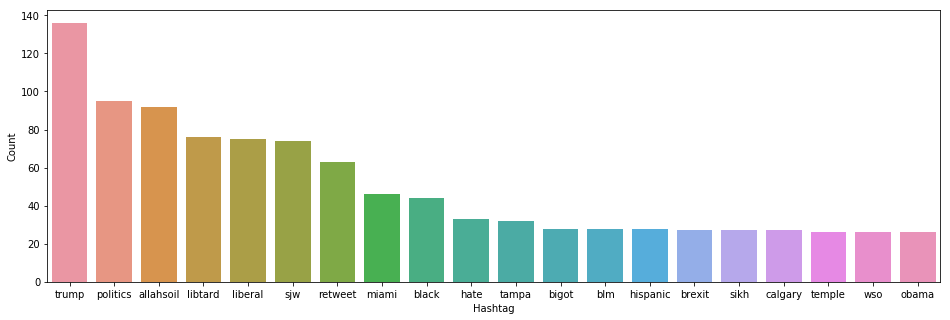

In [59]:
a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(49159, 1000)

In [0]:
max_len=50
max_features=20000

In [62]:
split_frac = 0.65018

split_num = int(len(combi['tidy_tweet']) * split_frac)

train_bow1 = reviews_int[:split_num] 
test_bow1 = reviews_int[split_num:] 
print(train_bow1.shape)
print(test_bow1.shape)

(31962,)
(17197,)


In [63]:
split_frac = 0.65018

split_num = int(len(combi['tidy_tweet']) * split_frac)

train_bow = bow[:split_num,:] 
test_bow = bow[split_num:,:] 
print(train_bow.shape)
print(test_bow.shape)
print(train['label'].shape)

(31962, 1000)
(17197, 1000)
(31962,)


In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(train_bow1, train['label'], test_size=0.3, random_state=42)

In [0]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from keras.optimizers import Adam
from keras.utils import to_categorical
from nltk.stem import PorterStemmer
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [66]:
classifier= Sequential()
classifier.add(Embedding(max_features, 100, mask_zero=True))
classifier.add(LSTM(200, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
classifier.add(Dense(1, activation='softmax'))
classifier.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 2,241,001
Trainable params: 2,241,001
Non-trainable params: 0
_________________________________________________________________


In [67]:
callback = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
classifier.fit(X_train, y_train,batch_size=100,epochs=5,callbacks=callback ,validation_data=(X_test, y_test))

Train on 22373 samples, validate on 9589 samples
Epoch 1/5


ValueError: ignored